In [1]:
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import mlrose_hiive
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score, ShuffleSplit, GridSearchCV, RandomizedSearchCV, train_test_split, learning_curve, ShuffleSplit

In [2]:
full_data = pd.read_csv('faults.csv')

In [3]:
full_data['target'] = pd.Categorical(full_data['target']).codes

In [4]:
full_data.isnull().values.any()
full_data2=full_data.dropna(axis=0)

In [5]:
X = full_data2.iloc[:, 0:27]
Y = full_data2.iloc[:, -1]

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, 
                                                    random_state = 3)

In [7]:
# Normalize feature data
scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [8]:
one_hot = OneHotEncoder()

y_train_hot = one_hot.fit_transform(y_train.values.reshape(-1, 1)).todense()
y_test_hot = one_hot.transform(y_test.values.reshape(-1, 1)).todense()

## random_hill_climb

In [139]:
# Initialize neural network object and fit object - attempt 1
nn_model1 = mlrose_hiive.NeuralNetwork(hidden_nodes = [15], activation ='relu', 
                                 algorithm ='random_hill_climb', 
                                 max_iters = 3000, bias = True, is_classifier = True, 
                                 learning_rate = 0.1, early_stopping = True, curve=True,
                                 clip_max = 5, max_attempts = 100, random_state = 3)

nn_model1.fit(X_train_scaled, y_train_hot)

NeuralNetwork(clip_max=5, curve=True, early_stopping=True, hidden_nodes=[15],
              max_attempts=100, max_iters=3000, random_state=3)

In [140]:
y_train_pred1 = nn_model1.predict(X_train_scaled)

y_train_accuracy1 = accuracy_score(y_train_hot, y_train_pred)

print(y_train_accuracy)

0.5986622073578596


In [141]:
# Predict labels for test set and assess accuracy
y_test_pred1 = nn_model1.predict(X_test_scaled)

y_test_accuracy1 = accuracy_score(y_test_hot, y_test_pred)

print(y_test_accuracy)

0.6203208556149733


### tune restart

In [257]:
#restart=5
nn_model1r5 = mlrose_hiive.NeuralNetwork(hidden_nodes = [15], activation ='relu', 
                                 algorithm ='random_hill_climb', 
                                 max_iters = 3000, bias = True, is_classifier = True, 
                                 learning_rate = 0.1, restarts = 5, early_stopping = True, curve=True,
                                 clip_max = 5, max_attempts = 100, random_state = 3)

nn_model1r5.fit(X_train_scaled, y_train_hot)

NeuralNetwork(clip_max=5, curve=True, early_stopping=True, hidden_nodes=[15],
              max_attempts=100, max_iters=3000, random_state=3, restarts=5)

In [258]:
y_train_pred1r5 = nn_model1r5.predict(X_train_scaled)

y_train_accuracy1r5 = accuracy_score(y_train_hot, y_train_pred)

print(y_train_accuracy1r5)

0.5752508361204013


In [259]:
# Predict labels for test set and assess accuracy
y_test_pred1r5 = nn_model1r5.predict(X_test_scaled)

y_test_accuracy1r5 = accuracy_score(y_test_hot, y_test_pred)

print(y_test_accuracy1r5)

0.5668449197860963


In [260]:
nn_model1r5.loss

1.005820408791986

In [261]:
nn_model1r10 = mlrose_hiive.NeuralNetwork(hidden_nodes = [15], activation ='relu', 
                                 algorithm ='random_hill_climb', 
                                 max_iters = 3000, bias = True, is_classifier = True, 
                                 learning_rate = 0.1, restarts = 10, early_stopping = True, curve=True,
                                 clip_max = 5, max_attempts = 100, random_state = 3)

nn_model1r10.fit(X_train_scaled, y_train_hot)

NeuralNetwork(clip_max=5, curve=True, early_stopping=True, hidden_nodes=[15],
              max_attempts=100, max_iters=3000, random_state=3, restarts=10)

In [262]:
y_train_pred1r10 = nn_model1r10.predict(X_train_scaled)

y_train_accuracy1r10 = accuracy_score(y_train_hot, y_train_pred)

print(y_train_accuracy1r10)
# Predict labels for test set and assess accuracy
y_test_pred1r10 = nn_model1r10.predict(X_test_scaled)

y_test_accuracy1r10 = accuracy_score(y_test_hot, y_test_pred)

print(y_test_accuracy1r10)

0.5752508361204013
0.5668449197860963


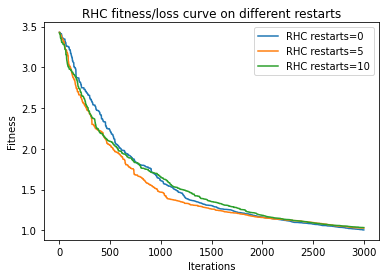

In [265]:
fig, ax = plt.subplots()  # Create a figure and an axes.
ax.plot(range(0,len(list(nn_model1.fitness_curve))),nn_model1.fitness_curve[...,0],'-',label='RHC restarts=0')  # Plot some data on the axes.
ax.plot(range(0,len(list(nn_model1r5.fitness_curve))),nn_model1r5.fitness_curve[...,0],'-',label='RHC restarts=5')  # Plot more data on the axes...
ax.plot(range(0,len(list(nn_model1r10.fitness_curve))),nn_model1r10.fitness_curve[...,0],'-',label='RHC restarts=10') # ... and some more.
#ax.plot(range(0,len(list(nn_model4.fitness_curve))),nn_model4.fitness_curve,'-',label='Gradient Descent')
ax.set_xlabel('Iterations')  # Add an x-label to the axes.
ax.set_ylabel('Fitness')  # Add a y-label to the axes.
ax.set_title("RHC fitness/loss curve on different restarts")  # Add a title to the axes.
ax.legend()  # Add a legend.

## simulated_annealing

In [195]:
nn_model2 = mlrose_hiive.NeuralNetwork(hidden_nodes = [15], activation ='relu', 
                                 algorithm ='simulated_annealing', 
                                 max_iters = 3000, bias = True, is_classifier = True, 
                                 learning_rate = 0.1, early_stopping = True, curve=True,
                                 clip_max = 5, max_attempts = 100, random_state = 4)

nn_model2.fit(X_train_scaled, y_train_hot)

NeuralNetwork(algorithm='simulated_annealing', clip_max=5, curve=True,
              early_stopping=True, hidden_nodes=[15], max_attempts=100,
              max_iters=3000, random_state=4)

In [196]:
y_train_pred = nn_model2.predict(X_train_scaled)

y_train_accuracy = accuracy_score(y_train_hot, y_train_pred)

print(y_train_accuracy)

0.5719063545150501


In [197]:
# Predict labels for test set and assess accuracy
y_test_pred = nn_model2.predict(X_test_scaled)

y_test_accuracy = accuracy_score(y_test_hot, y_test_pred)

print(y_test_accuracy)

0.553475935828877


In [249]:
Schedules = mlrose_hiive.GeomDecay(init_temp=1.0, decay=0.5, min_temp=0.001)
nn_model2s5 = mlrose_hiive.NeuralNetwork(hidden_nodes = [15], activation ='relu', 
                                 algorithm ='simulated_annealing', schedule = Schedules,
                                 max_iters = 3000, bias = True, is_classifier = True, 
                                 learning_rate = 0.1, early_stopping = True, curve=True,
                                 clip_max = 5, max_attempts = 100, random_state = 4)

nn_model2s5.fit(X_train_scaled, y_train_hot)

NeuralNetwork(algorithm='simulated_annealing', clip_max=5, curve=True,
              early_stopping=True, hidden_nodes=[15], max_attempts=100,
              max_iters=3000, random_state=4,
              schedule=GeomDecay(init_temp=1.0, decay=0.5, min_temp=0.001))

In [250]:
y_train_pred = nn_model2s5.predict(X_train_scaled)

y_train_accuracy = accuracy_score(y_train_hot, y_train_pred)

print(y_train_accuracy)
y_test_pred = nn_model2s5.predict(X_test_scaled)

y_test_accuracy = accuracy_score(y_test_hot, y_test_pred)

print(y_test_accuracy)

0.5852842809364549
0.5641711229946524


In [252]:
Schedules = mlrose_hiive.GeomDecay(init_temp=1.0, decay=0.1, min_temp=0.001)
nn_model2s1 = mlrose_hiive.NeuralNetwork(hidden_nodes = [15], activation ='relu', 
                                 algorithm ='simulated_annealing', schedule = Schedules,
                                 max_iters = 3000, bias = True, is_classifier = True, 
                                 learning_rate = 0.1, early_stopping = True, curve=True,
                                 clip_max = 5, max_attempts = 100, random_state = 4)

nn_model2s1.fit(X_train_scaled, y_train_hot)

NeuralNetwork(algorithm='simulated_annealing', clip_max=5, curve=True,
              early_stopping=True, hidden_nodes=[15], max_attempts=100,
              max_iters=3000, random_state=4,
              schedule=GeomDecay(init_temp=1.0, decay=0.1, min_temp=0.001))

In [253]:
y_train_pred = nn_model2s1.predict(X_train_scaled)

y_train_accuracy = accuracy_score(y_train_hot, y_train_pred)

print(y_train_accuracy)
y_test_pred = nn_model2s1.predict(X_test_scaled)

y_test_accuracy = accuracy_score(y_test_hot, y_test_pred)

print(y_test_accuracy)

0.5752508361204013
0.5668449197860963


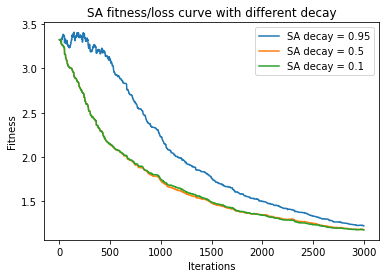

In [264]:
fig, ax = plt.subplots()  # Create a figure and an axes.
#ax.plot(range(0,len(list(nn_model1.fitness_curve))),nn_model1.fitness_curve[...,0],'-',label='RHC')  # Plot some data on the axes.
ax.plot(range(0,len(list(nn_model2.fitness_curve))),nn_model2.fitness_curve[...,0],'-',label='SA decay = 0.95')  # Plot more data on the axes...
ax.plot(range(0,len(list(nn_model2s5.fitness_curve))),nn_model2s5.fitness_curve[...,0],'-',label='SA decay = 0.5') # ... and some more.
ax.plot(range(0,len(list(nn_model2s1.fitness_curve))),nn_model2s1.fitness_curve[...,0],'-',label='SA decay = 0.1')
ax.set_xlabel('Iterations')  # Add an x-label to the axes.
ax.set_ylabel('Fitness')  # Add a y-label to the axes.
ax.set_title("SA fitness/loss curve with different decay")  # Add a title to the axes.
ax.legend()  # Add a legend.

Text(0.5, 1.0, 'NN Learning Curve using SA')

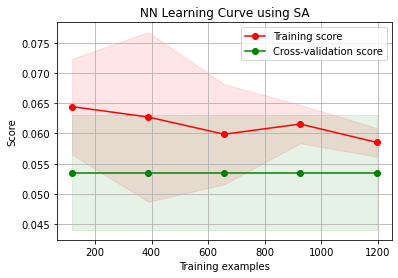

In [150]:
# cv = ShuffleSplit(n_splits=5,test_size=0.2,random_state=6666)
# # Calculate the training and testing scores
# train_scores, test_scores = validation_curve(nn_model1, X_train_scaled, y_train_hot, cv = cv)

# learning curve
train_sizes, train_scores, test_scores = learning_curve(nn_model2 , X_train_scaled, y_train_hot, cv = cv_method)

#fit_times_mean = np.mean(fit_times,axis = 1)
#fit_times_std = np.std(fit_times,axis = 1)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.grid()

plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")
plt.legend(loc="best")
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.title("NN Learning Curve using SA")

## genetic_alg

In [219]:
nn_model3 = mlrose_hiive.NeuralNetwork(hidden_nodes = [15], activation ='relu', 
                                 algorithm ='genetic_alg', 
                                 max_iters = 3000, bias = True, is_classifier = True, 
                                 learning_rate = 0.1, early_stopping = True, curve=True,
                                 clip_max = 5, max_attempts = 100, random_state = 5)

nn_model3.fit(X_train_scaled, y_train_hot)

NeuralNetwork(algorithm='genetic_alg', clip_max=5, curve=True,
              early_stopping=True, hidden_nodes=[15], max_attempts=100,
              max_iters=3000, random_state=5)

In [220]:
y_train_pred = nn_model3.predict(X_train_scaled)

y_train_accuracy = accuracy_score(y_train_hot, y_train_pred)

print(y_train_accuracy)

0.42006688963210703


In [221]:
# Predict labels for test set and assess accuracy
y_test_pred = nn_model3.predict(X_test_scaled)

y_test_accuracy = accuracy_score(y_test_hot, y_test_pred)

print(y_test_accuracy)

0.38235294117647056


In [231]:
nn_model3p100 = mlrose_hiive.NeuralNetwork(hidden_nodes = [15], activation ='relu', 
                                 algorithm ='genetic_alg', pop_size = 100,
                                 max_iters = 3000, bias = True, is_classifier = True, 
                                 learning_rate = 0.1, early_stopping = True, curve=True,
                                 clip_max = 5, max_attempts = 100, random_state = 5)

nn_model3p100.fit(X_train_scaled, y_train_hot)

NeuralNetwork(algorithm='genetic_alg', clip_max=5, curve=True,
              early_stopping=True, hidden_nodes=[15], max_attempts=100,
              max_iters=3000, pop_size=100, random_state=5)

In [233]:
y_train_predp100 = nn_model3p100.predict(X_train_scaled)

y_train_accuracyp100 = accuracy_score(y_train_hot, y_train_pred)

print(y_train_accuracyp100)

y_test_predp100 = nn_model3p100.predict(X_test_scaled)

y_test_accuracyp100 = accuracy_score(y_test_hot, y_test_pred)

print(y_test_accuracyp100)

0.7491638795986622
0.767379679144385


In [232]:
nn_model3p300 = mlrose_hiive.NeuralNetwork(hidden_nodes = [15], activation ='relu', 
                                 algorithm ='genetic_alg', pop_size = 300,
                                 max_iters = 3000, bias = True, is_classifier = True, 
                                 learning_rate = 0.1, early_stopping = True, curve=True,
                                 clip_max = 5, max_attempts = 100, random_state = 5)

nn_model3p300.fit(X_train_scaled, y_train_hot)

NeuralNetwork(algorithm='genetic_alg', clip_max=5, curve=True,
              early_stopping=True, hidden_nodes=[15], max_attempts=100,
              max_iters=3000, pop_size=300, random_state=5)

In [234]:
y_train_predp300 = nn_model3p300.predict(X_train_scaled)

y_train_accuracyp300 = accuracy_score(y_train_hot, y_train_pred)

print(y_train_accuracyp300)

y_test_predp300 = nn_model3p300.predict(X_test_scaled)

y_test_accuracyp300 = accuracy_score(y_test_hot, y_test_pred)

print(y_test_accuracyp300)

0.7491638795986622
0.767379679144385


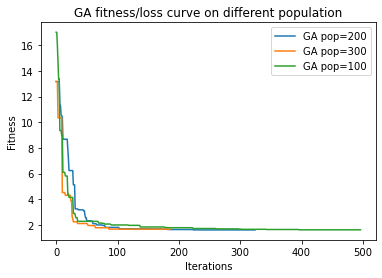

In [267]:
fig, ax = plt.subplots()  # Create a figure and an axes.
ax.plot(range(0,len(list(nn_model3.fitness_curve))),nn_model3.fitness_curve[...,0],'-',label='GA pop=200')  # Plot some data on the axes.
ax.plot(range(0,len(list(nn_model3p300.fitness_curve))),nn_model3p300.fitness_curve[...,0],'-',label='GA pop=300')  # Plot more data on the axes...
ax.plot(range(0,len(list(nn_model3p100.fitness_curve))),nn_model3p100.fitness_curve[...,0],'-',label='GA pop=100') # ... and some more.
#ax.plot(range(0,len(list(nn_model3p100f.fitness_curve))),nn_model3p100f.fitness_curve[...,0],'-',label='Gradient Descent')
ax.set_xlabel('Iterations')  # Add an x-label to the axes.
ax.set_ylabel('Fitness')  # Add a y-label to the axes.
ax.set_title("GA fitness/loss curve on different population")  # Add a title to the axes.
ax.legend()  # Add a legend.

In [243]:
nn_model3p100f = mlrose_hiive.NeuralNetwork(hidden_nodes = [15], activation ='relu', 
                                 algorithm ='genetic_alg', pop_size = 100,
                                 max_iters = 3000, bias = True, is_classifier = True, 
                                 learning_rate = 0.1, early_stopping = False, curve=True,
                                 clip_max = 5, max_attempts = 100, random_state = 5)

nn_model3p100f.fit(X_train_scaled, y_train_hot)

NeuralNetwork(algorithm='genetic_alg', clip_max=5, curve=True,
              hidden_nodes=[15], max_attempts=100, max_iters=3000, pop_size=100,
              random_state=5)

In [154]:
# cv = ShuffleSplit(n_splits=5,test_size=0.2,random_state=6666)
# # Calculate the training and testing scores

# learning curve
train_sizes, train_scores, test_scores = learning_curve(nn_model3 , X_train_scaled, y_train_hot, cv = cv_method)

#fit_times_mean = np.mean(fit_times,axis = 1)
#fit_times_std = np.std(fit_times,axis = 1)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.grid()

plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")
plt.legend(loc="best")
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.title("NN Learning Curve using GA")

KeyboardInterrupt: 

## gradient_descent

In [225]:
nn_model4 = mlrose_hiive.NeuralNetwork(hidden_nodes = [15], activation ='relu', 
                                 algorithm ='gradient_descent', 
                                 max_iters = 3000, bias = True, is_classifier = True, 
                                 learning_rate = 0.0001, early_stopping = True, curve=True, 
                                 clip_max = 5, max_attempts = 100, random_state = 3)

nn_model4.fit(X_train_scaled, y_train_hot)

NeuralNetwork(algorithm='gradient_descent', clip_max=5, curve=True,
              early_stopping=True, hidden_nodes=[15], learning_rate=0.0001,
              max_attempts=100, max_iters=3000, random_state=3)

In [226]:
y_train_pred = nn_model4.predict(X_train_scaled)

y_train_accuracy = accuracy_score(y_train_hot, y_train_pred)

print(y_train_accuracy)

0.7491638795986622


In [227]:
# Predict labels for test set and assess accuracy
y_test_pred = nn_model4.predict(X_test_scaled)

y_test_accuracy = accuracy_score(y_test_hot, y_test_pred)

print(y_test_accuracy)

0.767379679144385


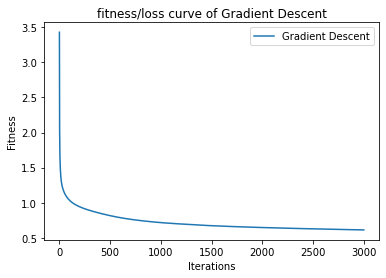

In [268]:
fig, ax = plt.subplots()  # Create a figure and an axes.
#ax.plot(range(0,len(list(nn_model1.fitness_curve))),nn_model1.fitness_curve[...,0],'-',label='RHC')  # Plot some data on the axes.
#ax.plot(range(0,len(list(nn_model2.fitness_curve))),nn_model2.fitness_curve[...,0],'-',label='SA')  # Plot more data on the axes...
#ax.plot(range(0,len(list(nn_model3.fitness_curve))),nn_model3.fitness_curve[...,0],'-',label='GA') # ... and some more.
ax.plot(range(0,len(list(nn_model4.fitness_curve))),-nn_model4.fitness_curve,'-',label='Gradient Descent')
ax.set_xlabel('Iterations')  # Add an x-label to the axes.
ax.set_ylabel('Fitness')  # Add a y-label to the axes.
ax.set_title("fitness/loss curve of Gradient Descent")  # Add a title to the axes.
ax.legend()  # Add a legend.

In [ ]:
# cv = ShuffleSplit(n_splits=5,test_size=0.2,random_state=6666)
# # Calculate the training and testing scores
# train_scores, test_scores = validation_curve(nn_model1, X_train_scaled, y_train_hot, cv = cv)
cv_method = ShuffleSplit(n_splits=3,test_size=0.2,random_state=6666)
# learning curve
train_sizes, train_scores, test_scores = learning_curve(nn_model4 , X_train_scaled, y_train_hot,cv = cv_method)

#fit_times_mean = np.mean(fit_times,axis = 1)
#fit_times_std = np.std(fit_times,axis = 1)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.grid()

plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")
plt.legend(loc="best")
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.title("NN Learning Curve using Gradient Descent")

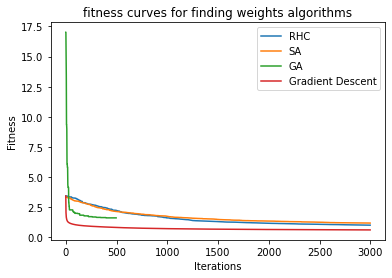

In [270]:
fig, ax = plt.subplots()  # Create a figure and an axes.
ax.plot(range(0,len(list(nn_model1.fitness_curve))),nn_model1.fitness_curve[...,0],'-',label='RHC')  # Plot some data on the axes.
ax.plot(range(0,len(list(nn_model2s5.fitness_curve))),nn_model2s5.fitness_curve[...,0],'-',label='SA')  # Plot more data on the axes...
ax.plot(range(0,len(list(nn_model3p100.fitness_curve))),nn_model3p100.fitness_curve[...,0],'-',label='GA') # ... and some more.
ax.plot(range(0,len(list(nn_model4.fitness_curve))),-nn_model4.fitness_curve,'-',label='Gradient Descent')
ax.set_xlabel('Iterations')  # Add an x-label to the axes.
ax.set_ylabel('Fitness')  # Add a y-label to the axes.
ax.set_title("fitness curves for finding weights algorithms")  # Add a title to the axes.
ax.legend()  # Add a legend.

In [ ]:
fig = plt.figure(figsize = (10, 5))
# creating the bar plot
plt.bar(["RHC","SA","GA","Gradient Descent"],[nn_model1.loss,nn_model2.loss,nn_model3.loss,nn_model4.loss], width = 0.4)
plt.ylabel("Loss")
plt.title("Loss of the different approaches")
plt.show()

## learning curves

Text(0.5, 1.0, 'Learning curves for NN using RHC')

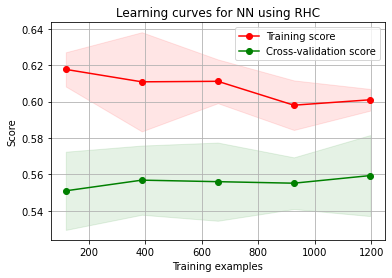

In [271]:
cv_method = ShuffleSplit(n_splits=4,test_size=0.2,random_state=6666)
# # Calculate the training and testing scores
# train_scores, test_scores = validation_curve(nn_model1, X_train_scaled, y_train_hot, cv = cv)

# learning curve
train_sizes, train_scores, test_scores = learning_curve(nn_model1 , X_train_scaled, y_train_hot,cv=cv_method)

#fit_times_mean = np.mean(fit_times,axis = 1)
#fit_times_std = np.std(fit_times,axis = 1)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.grid()

plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")
plt.legend(loc="best")
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.title("Learning curve for NN using RHC")

Text(0.5, 1.0, 'NN learning curve using SA with decay=0.5')

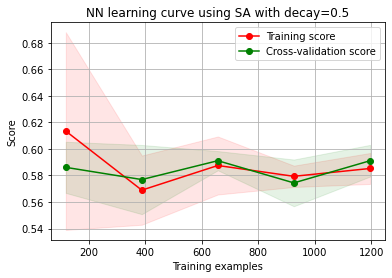

In [289]:
cv_method = ShuffleSplit(n_splits=4,test_size=0.2,random_state=6666)
# # Calculate the training and testing scores
# train_scores, test_scores = validation_curve(nn_model1, X_train_scaled, y_train_hot, cv = cv)

# learning curve
train_sizes, train_scores, test_scores = learning_curve(nn_model2s5 , X_train_scaled, y_train_hot,cv=cv_method)

#fit_times_mean = np.mean(fit_times,axis = 1)
#fit_times_std = np.std(fit_times,axis = 1)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.grid()

plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")
plt.legend(loc="best")
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.title("NN learning curve using SA with decay=0.5")

Text(0.5, 1.0, 'NN learning curve using GA (population = 100)')

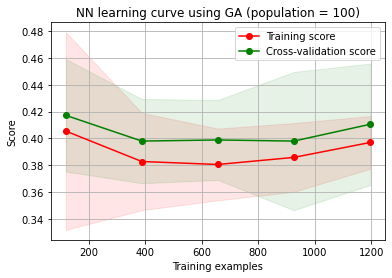

In [274]:
cv_method = ShuffleSplit(n_splits=4,test_size=0.2,random_state=6666)
# # Calculate the training and testing scores
# train_scores, test_scores = validation_curve(nn_model1, X_train_scaled, y_train_hot, cv = cv)

# learning curve
train_sizes, train_scores, test_scores = learning_curve(nn_model3p100 , X_train_scaled, y_train_hot,cv=cv_method)

#fit_times_mean = np.mean(fit_times,axis = 1)
#fit_times_std = np.std(fit_times,axis = 1)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.grid()

plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")
plt.legend(loc="best")
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.title("NN learning curve using GA (population = 100)")

Text(0.5, 1.0, 'NN learning curve using Gradient Descent')

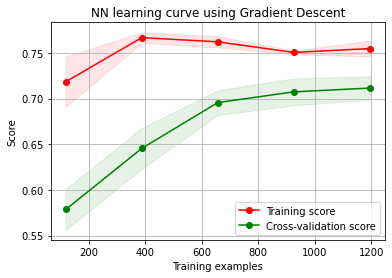

In [273]:
cv_method = ShuffleSplit(n_splits=4,test_size=0.2,random_state=6666)
# # Calculate the training and testing scores
# train_scores, test_scores = validation_curve(nn_model1, X_train_scaled, y_train_hot, cv = cv)

# learning curve
train_sizes, train_scores, test_scores = learning_curve(nn_model4 , X_train_scaled, y_train_hot,cv=cv_method)

#fit_times_mean = np.mean(fit_times,axis = 1)
#fit_times_std = np.std(fit_times,axis = 1)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.grid()

plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")
plt.legend(loc="best")
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.title("NN learning curve using Gradient Descent")

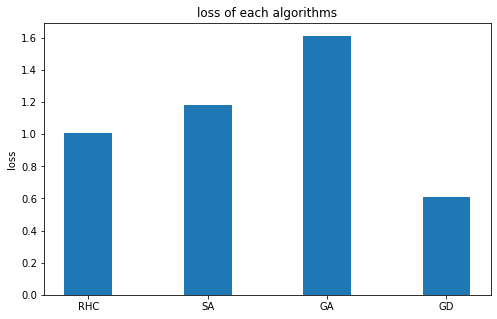

In [276]:
fig = plt.figure(figsize = (8, 5))
names = ["RHC","SA","GA","GD"]
loss_list=[nn_model1.loss,nn_model2s5.loss,nn_model3p100.loss,nn_model4.loss]
# creating the bar plot
plt.bar(names,loss_list, width = 0.4)
plt.ylabel("loss")
plt.title("loss of each algorithms")
plt.show()

In [280]:
y_test_pred1 = nn_model1.predict(X_test_scaled)

y_test_accuracy1 = accuracy_score(y_test_hot, y_test_pred1)

print(y_test_accuracy1)

0.6203208556149733


In [281]:
y_test_pred2 = nn_model2s5.predict(X_test_scaled)

y_test_accuracy2 = accuracy_score(y_test_hot, y_test_pred2)

print(y_test_accuracy2)

0.5641711229946524


In [282]:
y_test_pred3 = nn_model3p100.predict(X_test_scaled)

y_test_accuracy3 = accuracy_score(y_test_hot, y_test_pred3)

print(y_test_accuracy3)

0.3582887700534759


In [283]:
y_test_pred4 = nn_model4.predict(X_test_scaled)

y_test_accuracy4 = accuracy_score(y_test_hot, y_test_pred4)

print(y_test_accuracy4)

0.767379679144385


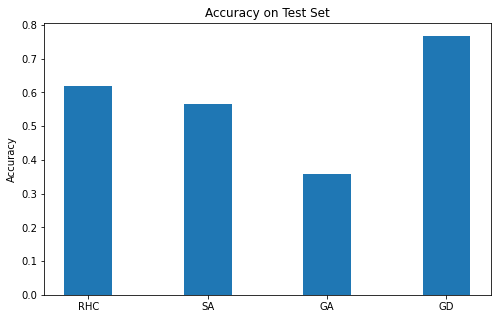

In [290]:
fig = plt.figure(figsize = (8, 5))
names = ["RHC","SA","GA","GD"]
accuracy_list=[y_test_accuracy1,y_test_accuracy2, y_test_accuracy3, y_test_accuracy4]
# creating the bar plot
plt.bar(names,accuracy_list, width = 0.4)
plt.ylabel("Accuracy")
plt.title("Accuracy on Test Set")
plt.show()